<a href="https://colab.research.google.com/github/gurovic/MLCourse/blob/main/140_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Наивный байесовский классификатор (Naive Bayes)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## 🟢 Базовый уровень: Основы алгоритма

### 1.1 Принцип работы "наивного" Байеса
**Суть метода:** Предсказывает вероятность класса на основе теоремы Байеса с "наивным" предположением о независимости признаков:

$P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}$

**Почему "наивный"?** Алгоритм предполагает, что все признаки независимы друг от друга, что редко выполняется в реальности, но часто дает хорошие результаты.

### 1.2 Базовые типы классификаторов
1. **Гауссовский (GaussianNB):** Для непрерывных данных, предполагает нормальное распределение
2. **Мультиномиальный (MultinomialNB):** Для дискретных данных (например, частоты слов)
3. **Бернуллиевский (BernoulliNB):** Для бинарных признаков

### 1.3 Простой пример классификации

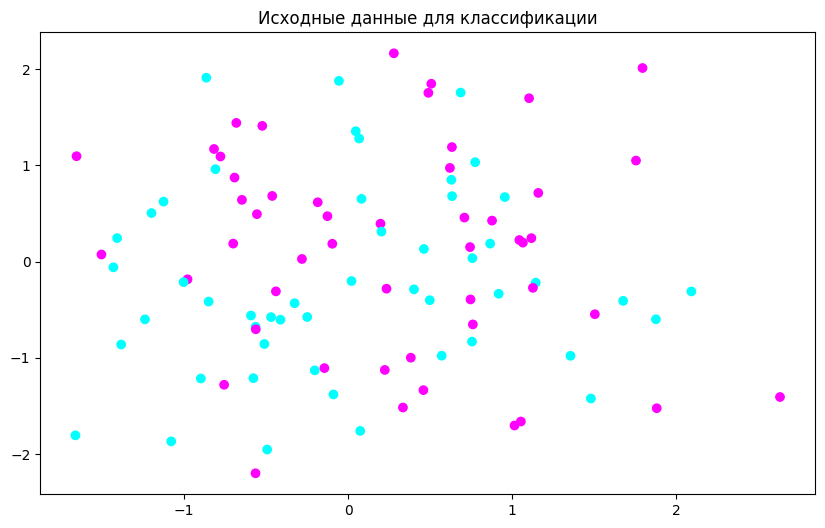

In [24]:
# Создаем искусственные данные
X, y = make_classification(n_samples=100, n_features=12, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Обучаем модель
model = GaussianNB()
model.fit(X_train, y_train)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool')
plt.title("Исходные данные для классификации")
plt.show()

## 🟡 Продвинутый уровень: Применение на практике

### 2.1 Работа с текстовыми данными
Типичное применение - классификация текстов (спам/не спам, тематика и т.д.)

In [25]:
# Пример данных: тексты и их категории
texts = [
    "купите наши новые часы",
    "срочно купите виагру",
    "сегодня отличная погода",
    "встречаемся в парке в пятницу"
]
labels = [1, 1, 0, 0]  # 1=спам, 0=не спам

# Преобразуем тексты в векторы частот слов
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Обучаем мультиномиальный Байес
model = MultinomialNB()
model.fit(X, labels)

# Предсказываем для нового текста
new_text = ["купите виагру со скидкой"]
X_new = vectorizer.transform(new_text)
print("Предсказание:", model.predict(X_new))  # Вероятно 1 (спам)

Предсказание: [1]


### 2.2 Оценка качества модели

Точность: 0.37


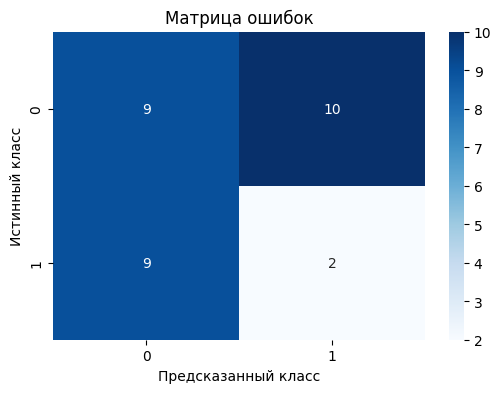

In [26]:
# Для Гауссовского примера
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

### 2.3 Преимущества и ограничения
| **Преимущества**               | **Недостатки**                 |
|--------------------------------|--------------------------------|
| Быстрое обучение и предсказание | Наивное предположение о независимости |
| Хорошо работает с большими данными | Плохо работает с зависимыми признаками |
| Нужно мало данных для обучения | Проблемы с редкими признаками |
| Простота интерпретации         | Не подходит для сложных зависимостей |

## 🔴 Экспертный уровень: Продвинутые техники

### 3.1 Сглаживание Лапласа
Решение проблемы нулевых вероятностей для отсутствующих признаков:

$\hat{P}(x_i|y) = \frac{N_{y,x_i} + \alpha}{N_y + \alpha \cdot N_{features}}$

In [27]:
# Пример использования сглаживания
model = GaussianNB()  # Подходит для любых числовых данных
model.fit(X_train, y_train)

GaussianNB()

### 3.2 Работа с несбалансированными классами

In [28]:
# Использование class_prior
class_priors = [0.8, 0.2]  # Задаем априорные вероятности классов
model = GaussianNB(priors=class_priors)
model.fit(X_train, y_train)

GaussianNB(priors=[0.8, 0.2])

### 3.3 Кастомные функции правдоподобия
Расширение функциональности через наследование:

In [29]:
class CustomNB(GaussianNB):
    def _log_likelihood(self, X, mean, var):
        # Кастомная функция правдоподобия
        return -0.5 * np.sum(np.log(2. * np.pi * var) +
                            (X - mean) ** 2 / var, axis=1)

## 📊 Чеклист по уровням

| Уровень | Навыки |
|---------|--------|
| 🟢 | Понимание теоремы Байеса, выбор типа классификатора |
| 🟡 | Обработка текстов, оценка качества, работа с alpha |
| 🔴 | Кастомные функции, работа с несбалансированными данными |

## ⚠️ Типичные ошибки
1. **Использование неподходящего типа NB**  
   Гауссовский для дискретных данных или наоборот
   
2. **Игнорирование сглаживания**  
   Без alpha=1 могут быть нулевые вероятности

3. **Неправильная обработка текстов**  
   Отсутствие нормализации (стемминг, лемматизация)

4. **Игнорирование априорных вероятностей**  
   Особенно важно при несбалансированных классах

## 🚀 Полезные советы

1. **Предобработка данных:**

In [30]:
# Для текстов: стемминг + удаление стоп-слов
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
processed_texts = [" ".join([stemmer.stem(word) for word in text.split()])
                   for text in texts]

2. **Подбор alpha:**

Точность GaussianNB: 0.8133


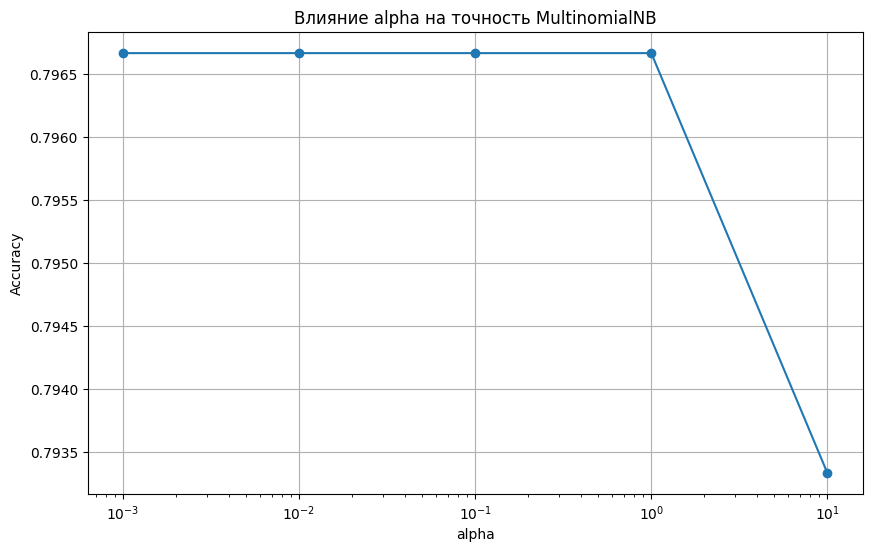

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import matplotlib.pyplot as plt
import numpy as np

# Создаем тестовые данные (если у вас уже есть свои данные, пропустите этот шаг)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Для GaussianNB (не имеет параметра alpha)
model = GaussianNB()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Точность GaussianNB: {accuracy:.4f}")

# Для MultinomialNB (имеет параметр alpha) - нужно преобразовать данные
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0.001, 0.01, 0.1, 1, 10]
scores = []

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)  # Здесь используем alpha
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.title('Влияние alpha на точность MultinomialNB')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

3. **Интерпретация важности признаков:**

In [32]:
# Для текстового классификатора
feature_names = vectorizer.get_feature_names_out()
coefs = model.feature_log_prob_[0]  # Для класса 0
top_features = sorted(zip(feature_names, coefs), key=lambda x: x[1], reverse=True)[:10]
print("Самые важные признаки:", [f[0] for f in top_features])

Самые важные признаки: ['встречаемся', 'купите', 'пятницу', 'наши', 'парке', 'срочно', 'погода', 'новые', 'виагру', 'сегодня']


## 📌 Практические задания

### 🟢 Базовый уровень
1. Обучите GaussianNB на данных iris. Оцените точность.
2. Визуализируйте границы решений для двух признаков.

### 🟡 Продвинутый уровень
1. Постройте спам-фильтр для SMS-сообщений (используйте MultinomialNB).
2. Исследуйте влияние alpha на точность.

### 🔴 Экспертный уровень
1. Реализуйте кастомный NB для данных с зависимыми признаками.
2. Сравните NB с LogisticRegression на большом текстовом датасете.

### Решение задания 🟢 (частичное)

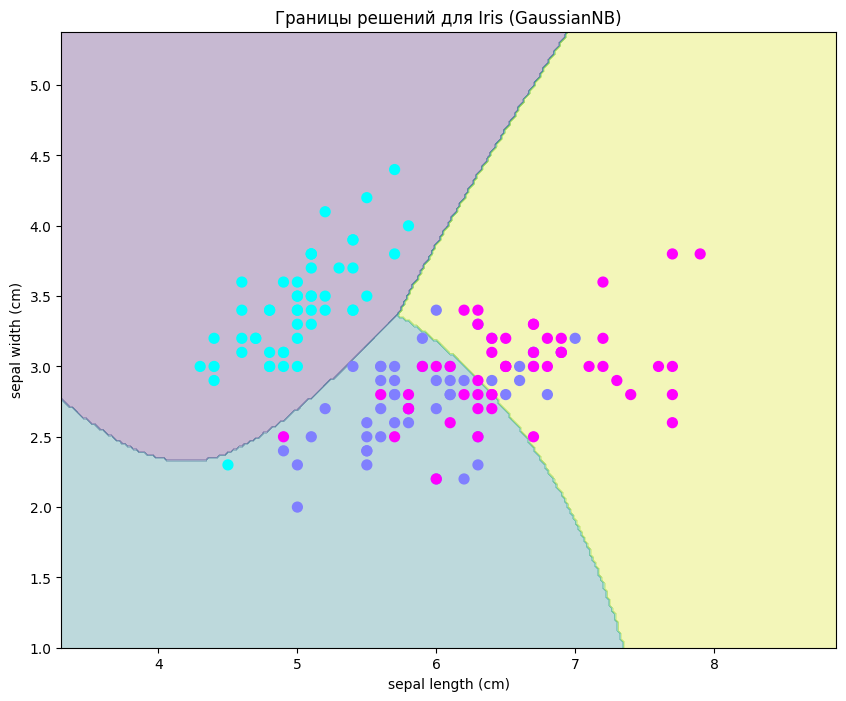

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Берем только 2 признака

model = GaussianNB()
model.fit(X, y)

# Визуализация границ
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool', s=50)
plt.title("Границы решений для Iris (GaussianNB)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## 📌 Итоги
Ключевые идеи:
1. **Простота и скорость** - главные преимущества метода
2. **Три основных типа** (Gaussian, Multinomial, Bernoulli) для разных данных
3. **Сглаживание (alpha)** обязательно для текстовых данных
4. **Априорные вероятности (priors)** важны для несбалансированных классов

Когда использовать:
- Быстрый baseline для классификации
- Текстовые данные (спам, категоризация)
- Большие наборы данных с большим количеством признаков
- Системы реального времени с ограниченными ресурсами

> "Наивный Байес - как надежный старый автомобиль: не самый сложный, но заводится в любую погоду и довезет до цели"